In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (9, 9)

sns.set()

In [2]:
movie_df = pd.read_csv('movies_pr.csv')
with open('genre.txt') as file:
    genre_set = set(line.strip() for line in file)

In [9]:
genre_column_lst = []
for genre in genre_set:
    genre_column_lst.append(genre)
genre_column_lst.append('pagerank')
score_df = movie_df.drop(columns=genre_column_lst)

# This the one that works best

for genre in genre_set:
    
    x = np.array(movie_df['pagerank'])
    y = np.array(movie_df[f'{genre}'])
    m, b = np.polyfit(x, y, deg=1)
    new_y = y / (m * x + b)
    
    score_df[genre] = new_y - 1

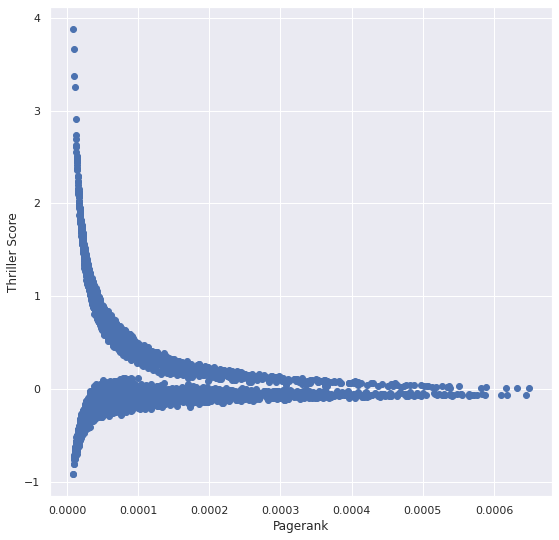

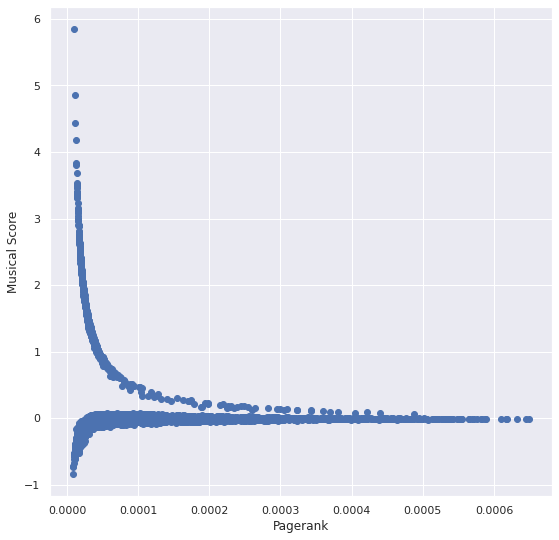

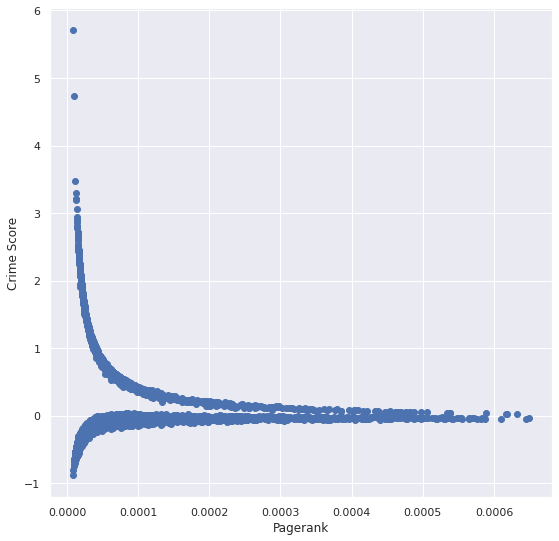

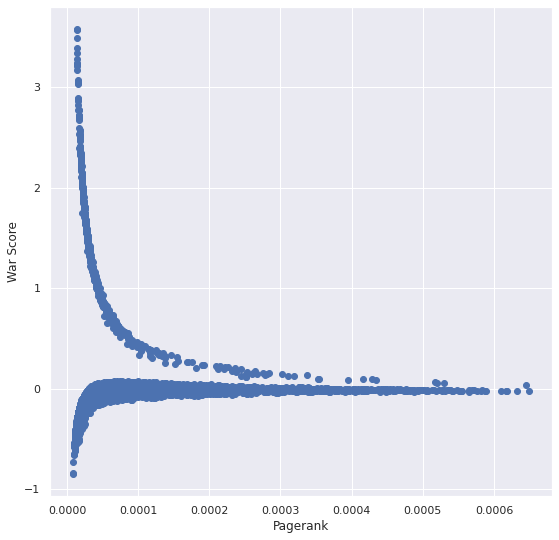

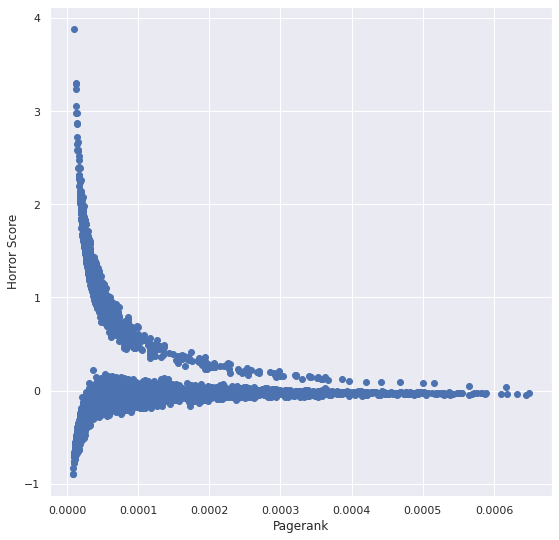

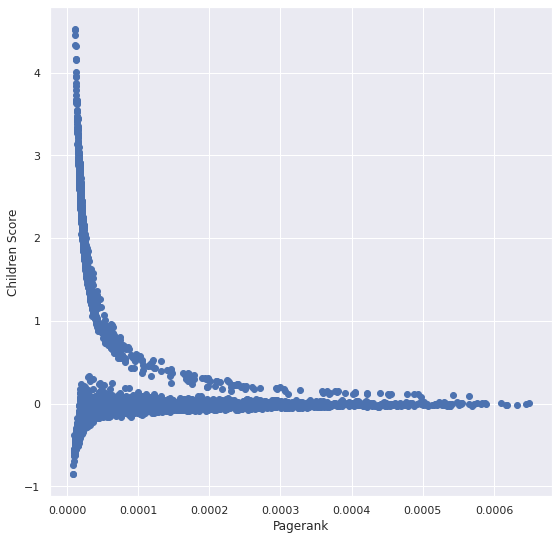

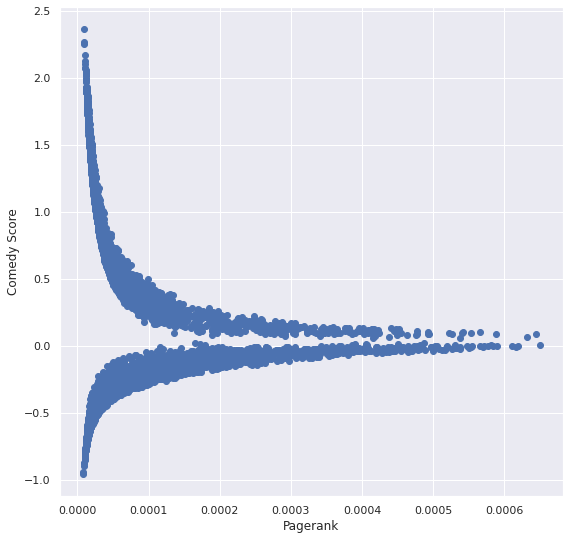

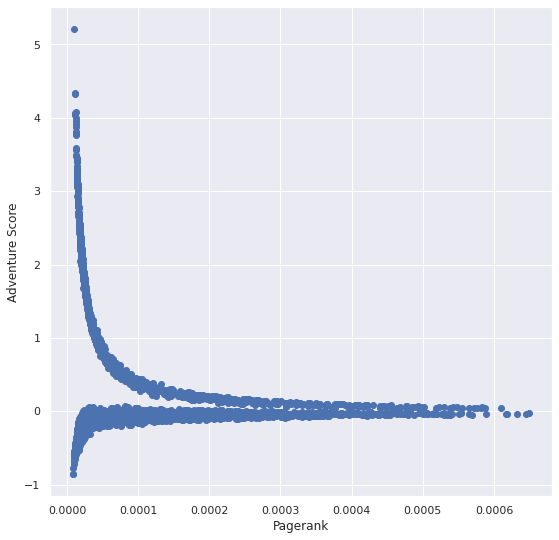

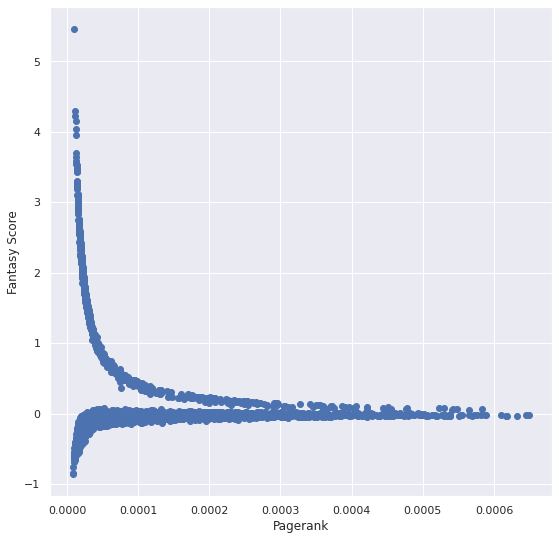

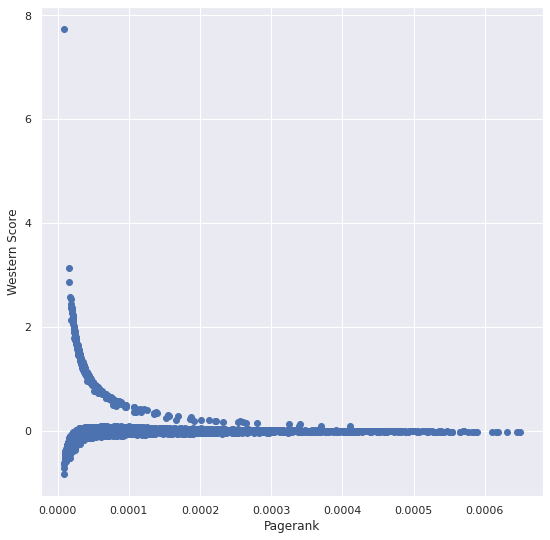

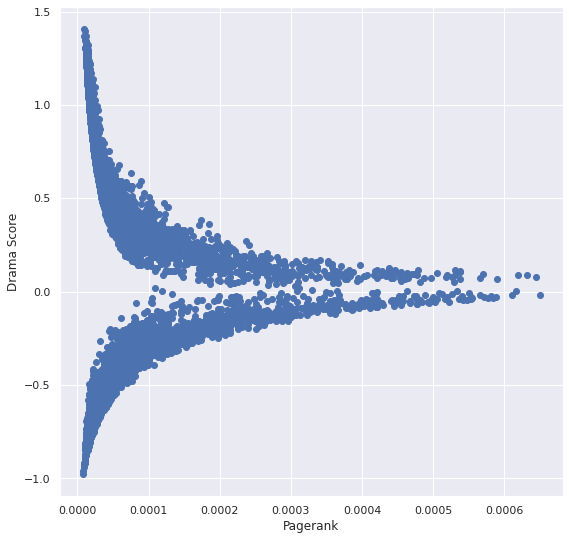

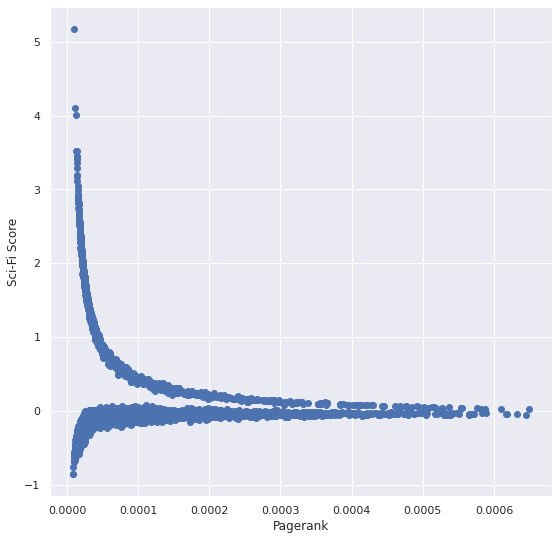

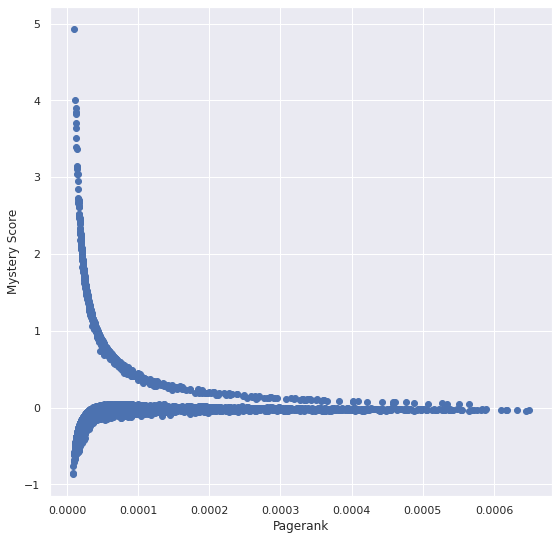

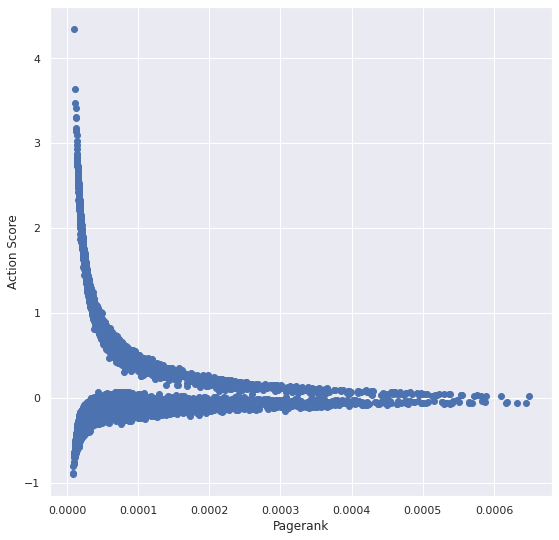

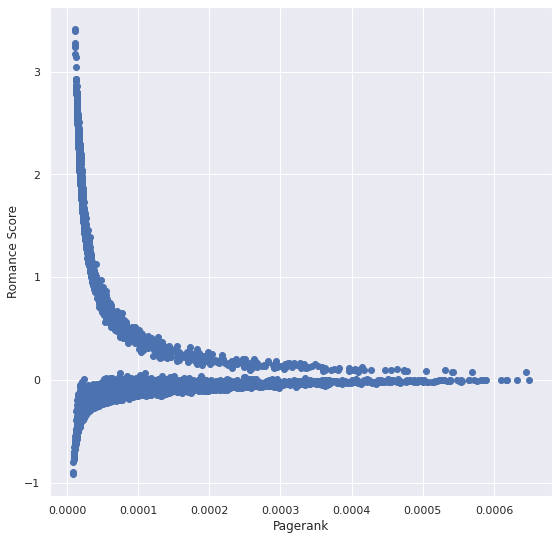

In [11]:
for genre in genre_set:

    x = np.array(movie_df['pagerank'])
    y = np.array(score_df[genre])
    plt.scatter(x, y)

    m, b = np.polyfit(x, y, deg=1)
    x_fit = np.array([x.min(), x.max()])
    y_fit = m * x_fit + b
    # plt.plot(x_fit, y_fit)

    plt.xlabel('Pagerank')
    plt.ylabel(f'{genre} Score')
    plt.show()

    new_y = y / (m * x + b)

In [12]:
colors = sns.color_palette('tab20')
genre_lst = list(genre_set)
genre_lst.sort()
genre2color = {genre:colors[i] for i, genre in enumerate(genre_lst)}

In [13]:
def show_pie_chart(tmdb_id_lst):
    for tmdb_id in tmdb_id_lst:

        row = score_df[score_df['tmdb_id'] == tmdb_id].squeeze()

        title = row['title']
        genre_lst = []
        score_lst = []
        color_lst = []

        print(row['genres'])

        for genre in genre_set:
            score = row[genre]
            if score > 0:
                genre_lst.append(genre)
                score_lst.append(score)
                color_lst.append(genre2color[genre])

        plt.pie(score_lst, labels = genre_lst, colors=color_lst, autopct='%.1f%%')
        plt.title(title)
        plt.show()

{'Thriller': 1, 'Musical': 1, 'Crime': 1, 'War': 1, 'Horror': 1, 'Children': 1, 'Comedy': 1, 'Adventure': 1, 'Fantasy': 1, 'Western': 1, 'Drama': 1, 'Sci-Fi': 1, 'Mystery': 1, 'Action': 1, 'Romance': 1}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['Thriller', 'Musical', 'Crime', 'War', 'Horror', 'Children', 'Comedy', 'Adventure', 'Fantasy', 'Western', 'Drama', 'Sci-Fi', 'Mystery', 'Action', 'Romance']


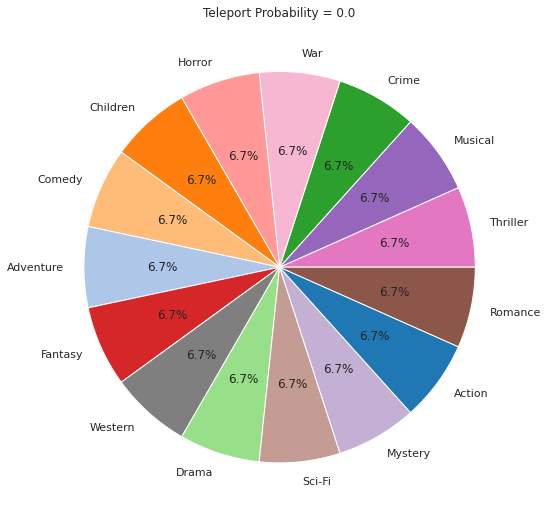

In [14]:
genre2score = {'Action': 1, 'Adventure': 1, 'Drama': 1}

genre2score = {genre:1 for genre in genre_set}

genre_lst = []
score_lst = []
color_lst = []
for genre in genre_set:
    if genre not in genre2score:
        continue
    score = genre2score[genre]
    if score > 0:
        genre_lst.append(genre)
        score_lst.append(score)
        color_lst.append(genre2color[genre])

print(genre2score)
print(score_lst)
print(genre_lst)

plt.pie(score_lst, labels = genre_lst, colors=color_lst, autopct='%.1f%%')
plt.title('Teleport Probability = 0.0')
plt.show()

Adventure|Children|Fantasy


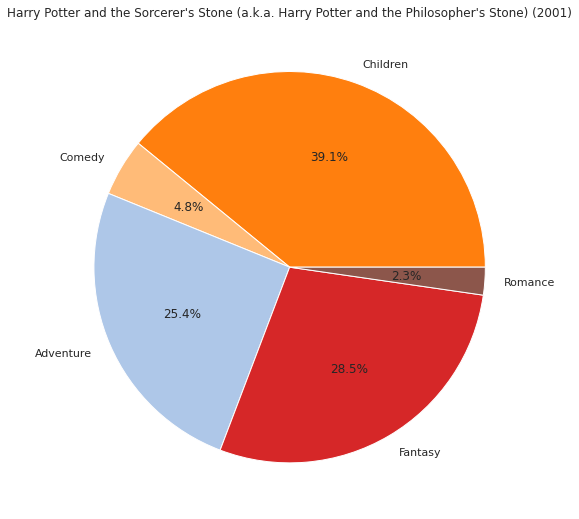

Adventure|Fantasy


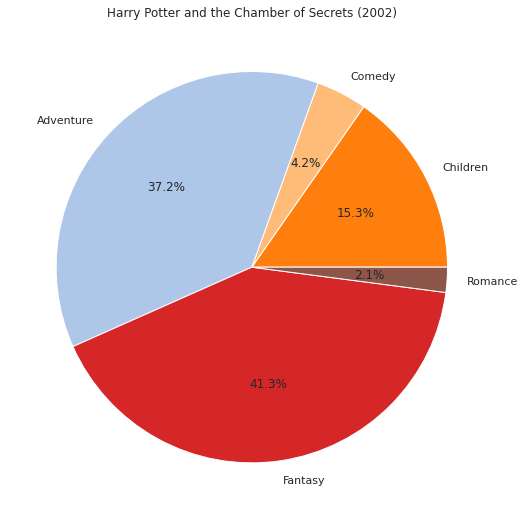

Adventure|Fantasy|IMAX


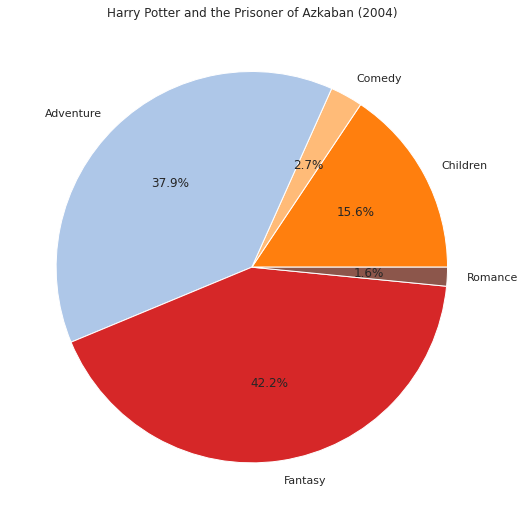

Adventure|Fantasy|Thriller|IMAX


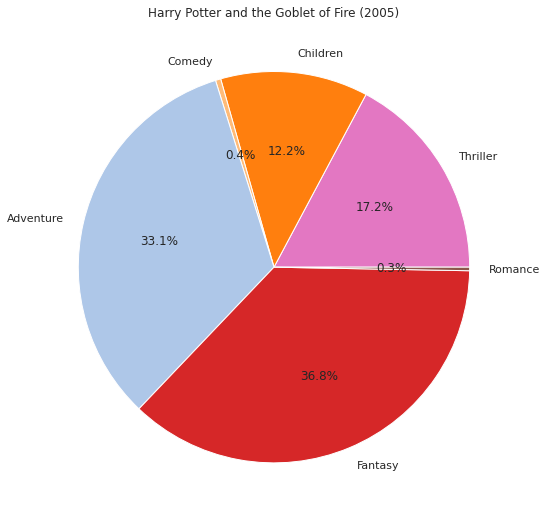

Adventure|Drama|Fantasy|IMAX


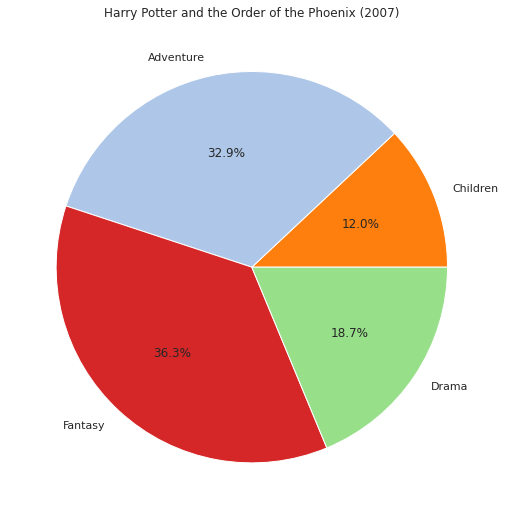

Adventure|Fantasy|Mystery|Romance|IMAX


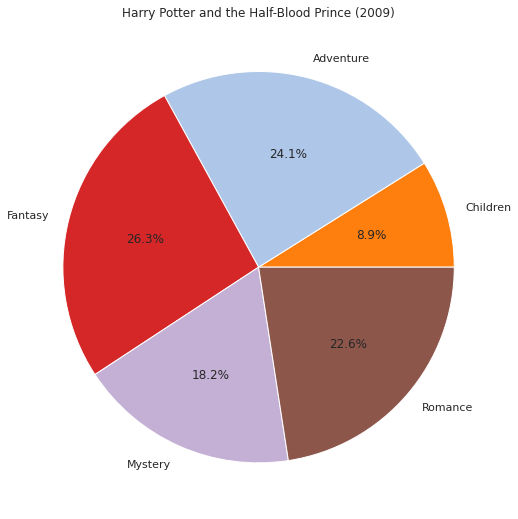

Action|Adventure|Fantasy|IMAX


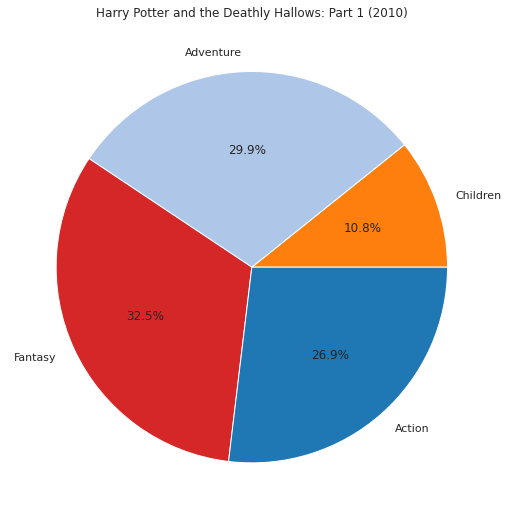

Action|Adventure|Drama|Fantasy|Mystery|IMAX


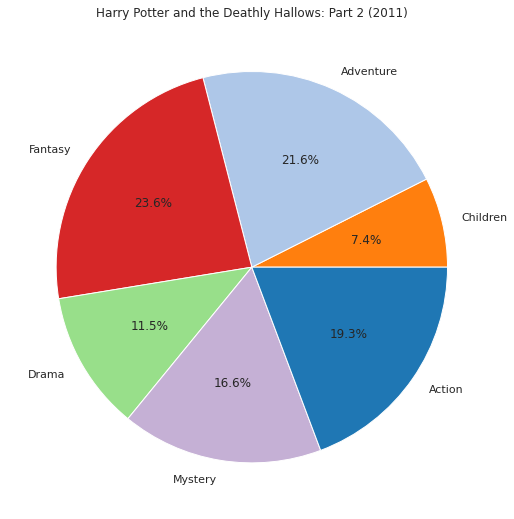

In [19]:
# Harry potter
movie_lst = [671, 672, 673, 674, 675, 767, 12444, 12445]
show_pie_chart(movie_lst)

Action|Adventure|Western


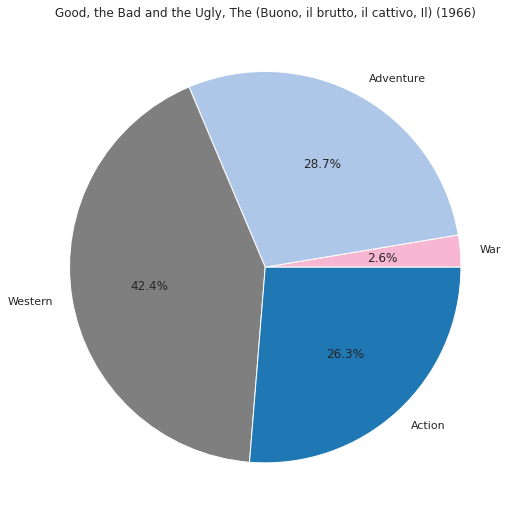

Drama|Sci-Fi


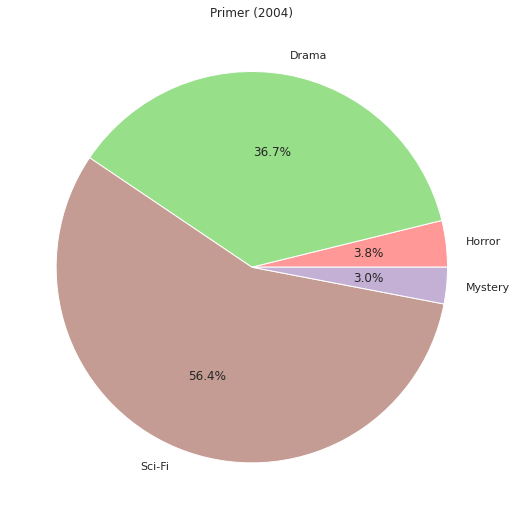

Action|Adventure|Horror|Sci-Fi


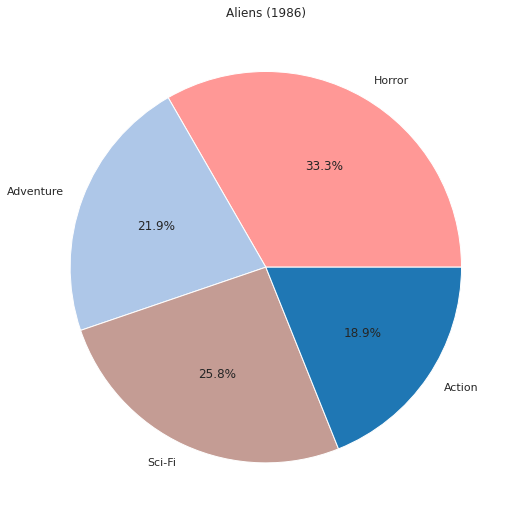

Mystery|Sci-Fi|Thriller


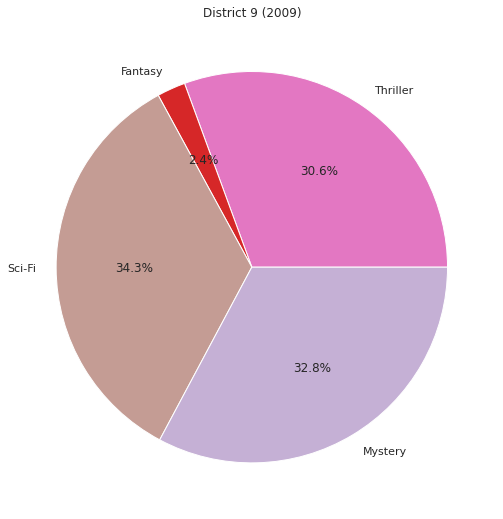

Comedy|Fantasy|Romance


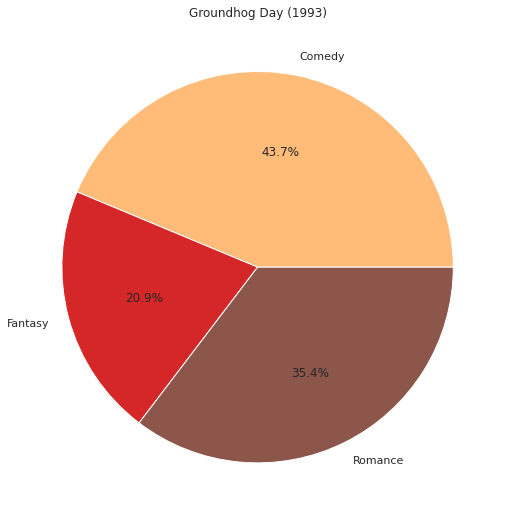

Drama|Sci-Fi|Thriller


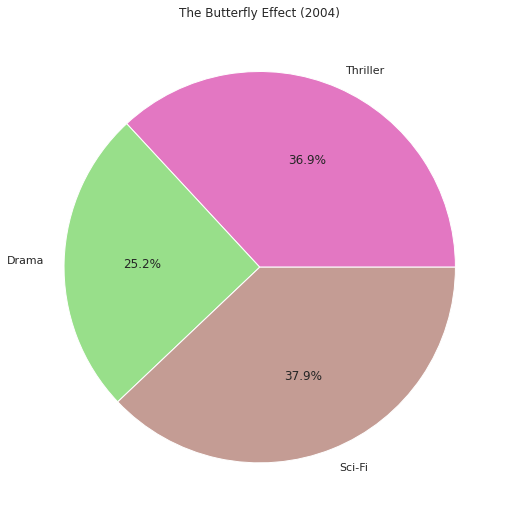

Horror|Sci-Fi


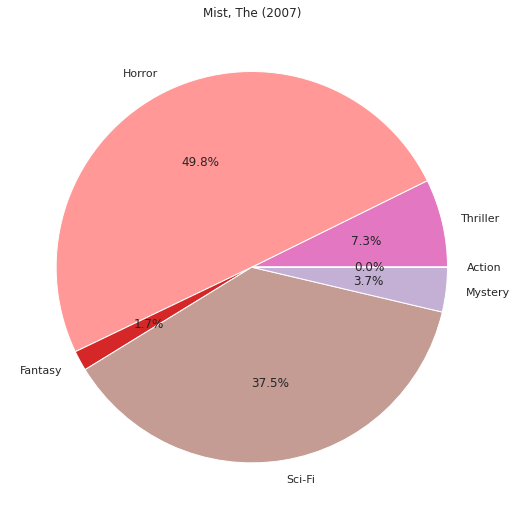

Adventure|Children|Fantasy


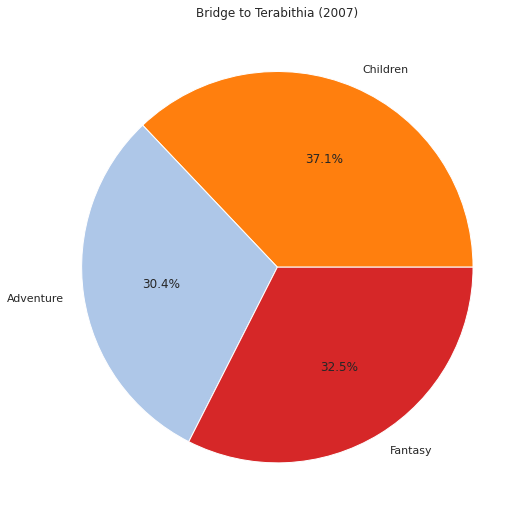

Drama


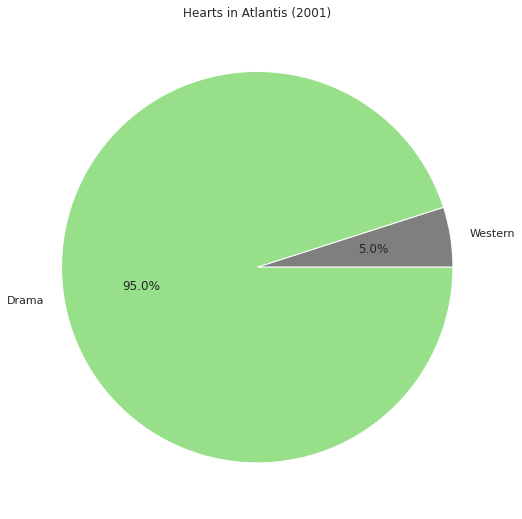

Sci-Fi|Thriller


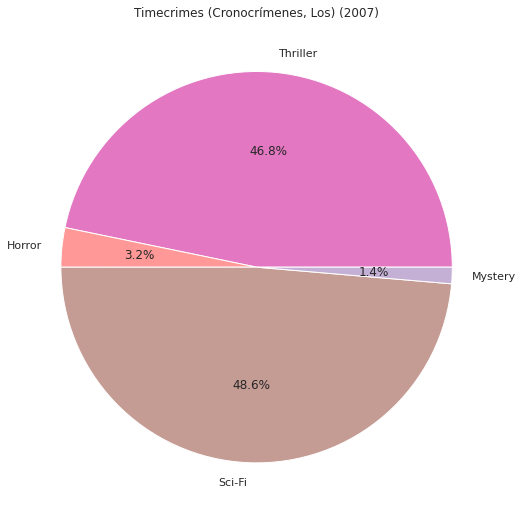

Comedy|Crime|Drama|Thriller


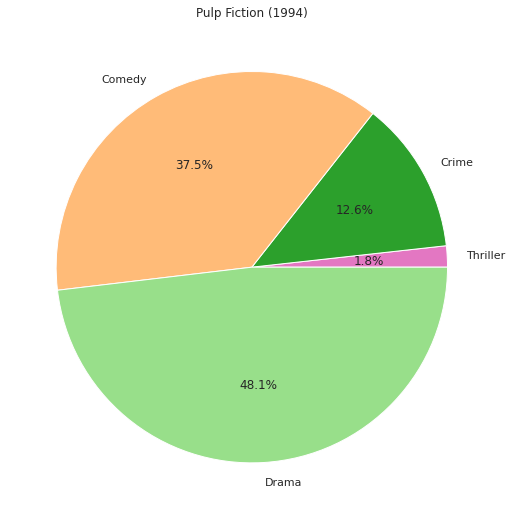

Comedy|Drama|Romance|War


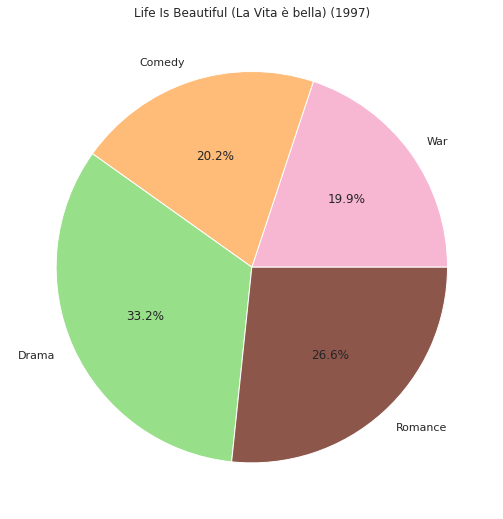

Adventure|Fantasy


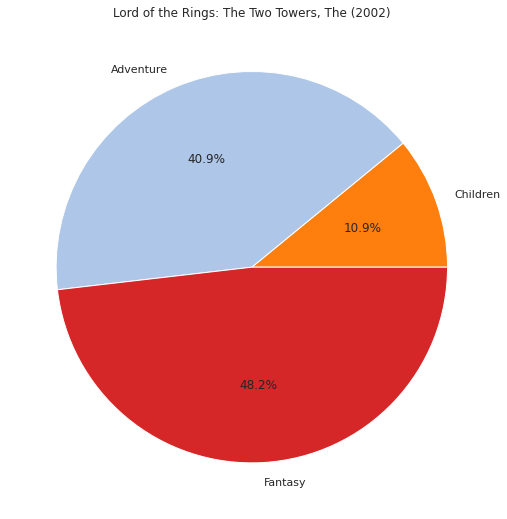

Adventure|Fantasy


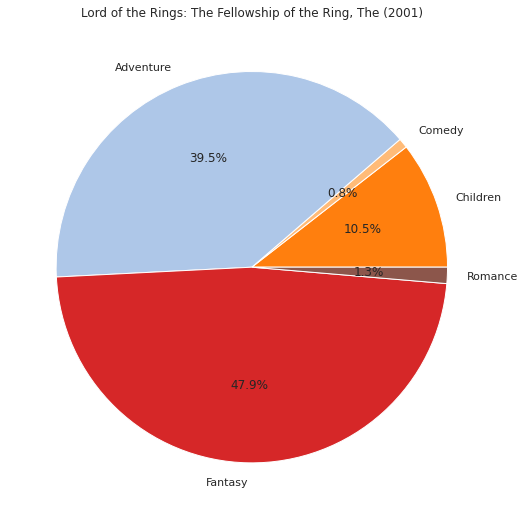

Action|Adventure|Drama|Fantasy


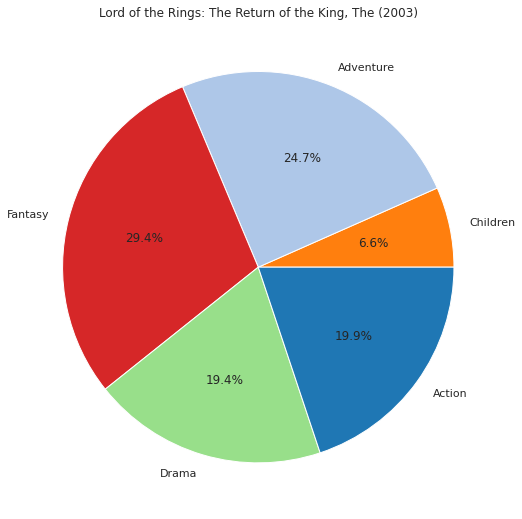

Crime|Drama


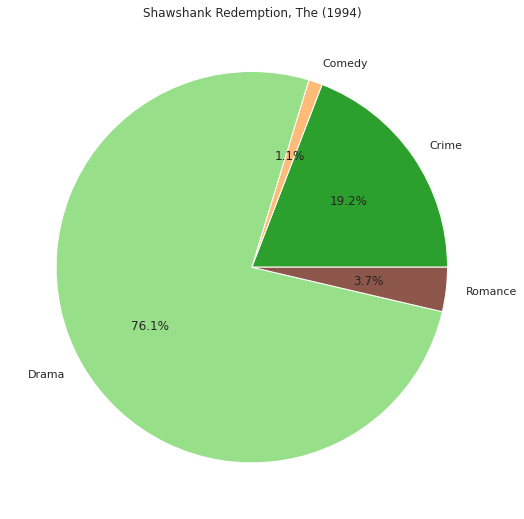

Action|Sci-Fi|Thriller


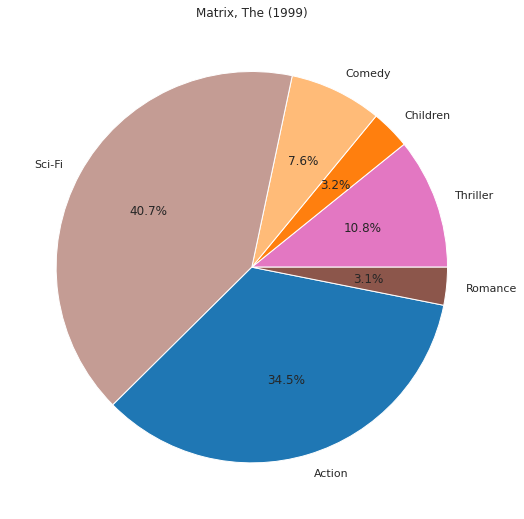

Comedy|Horror


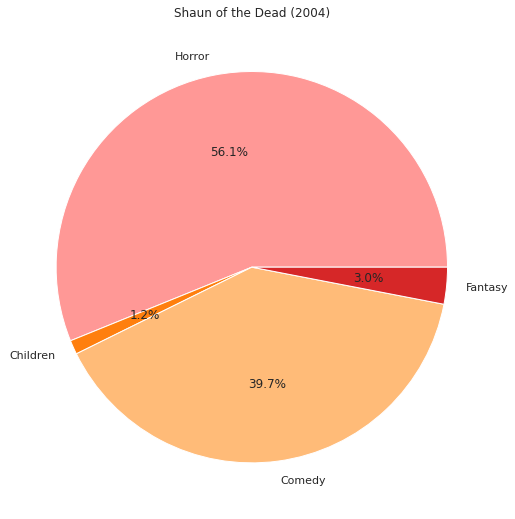

Drama|Fantasy|Romance


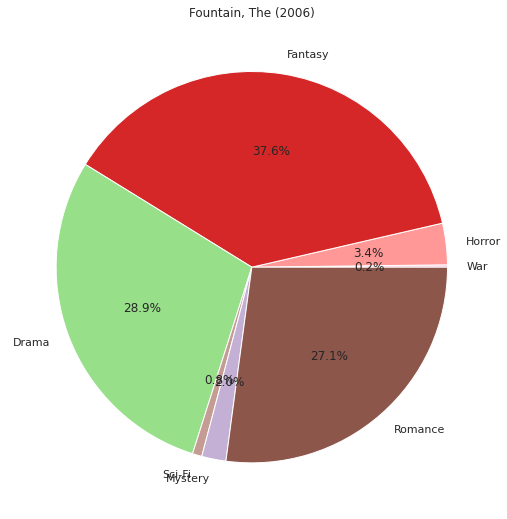

Comedy|Crime|Drama|Thriller


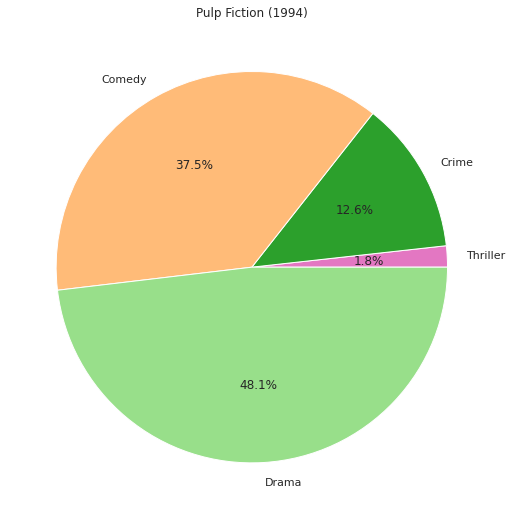

Action|Drama|Thriller


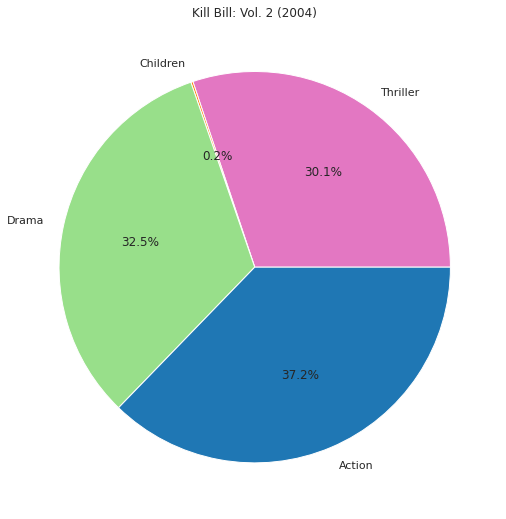

In [18]:
movie_lst = [429, 14337, 679, 17654, 137, 
                 1954, 5876, 1265, 11313, 14139, 680, 
                 637, 121, 120, 122, 278, 603, 747, 1381, 680, 393]

show_pie_chart(movie_lst)